**Energy Consumption For PJM Interconnection LLC**

https://www.kaggle.com/robikscube/hourly-energy-consumption

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas_profiling

warnings.filterwarnings("ignore")

**Import all .csv of PJM Energy Consumption**

In [2]:
#load datasets, set index as "Datetime", add categorical column "Utility"
AEP = pd.read_csv("PJM_Data/AEP_hourly.csv").set_index("Datetime")
AEP.index = pd.to_datetime(AEP.index)
AEP = AEP.groupby(pd.Grouper(freq="D")).mean()

COMED = pd.read_csv("PJM_Data/COMED_hourly.csv").set_index("Datetime")
COMED.index = pd.to_datetime(COMED.index)
COMED = COMED.groupby(pd.Grouper(freq="D")).mean()

DAYTON = pd.read_csv("PJM_Data/DAYTON_hourly.csv").set_index("Datetime")
DAYTON.index = pd.to_datetime(DAYTON.index)
DAYTON = DAYTON.groupby(pd.Grouper(freq="D")).mean()

DEOK = pd.read_csv("PJM_Data/DEOK_hourly.csv").set_index("Datetime")
DEOK.index = pd.to_datetime(DEOK.index)
DEOK = DEOK.groupby(pd.Grouper(freq="D")).mean()

DOM = pd.read_csv("PJM_Data/DOM_hourly.csv").set_index("Datetime")
DOM.index = pd.to_datetime(DOM.index)
DOM = DOM.groupby(pd.Grouper(freq="D")).mean()

DUQ = pd.read_csv("PJM_Data/DUQ_hourly.csv").set_index("Datetime")
DUQ.index = pd.to_datetime(DUQ.index)
DUQ = DUQ.groupby(pd.Grouper(freq="D")).mean()

EKPC = pd.read_csv("PJM_Data/EKPC_hourly.csv").set_index("Datetime")
EKPC.index = pd.to_datetime(EKPC.index)
EKPC = EKPC.groupby(pd.Grouper(freq="D")).mean()

FE = pd.read_csv("PJM_Data/FE_hourly.csv").set_index("Datetime")
FE.index = pd.to_datetime(FE.index)
FE = FE.groupby(pd.Grouper(freq="D")).mean()

NI = pd.read_csv("PJM_Data/NI_hourly.csv").set_index("Datetime")
NI.index = pd.to_datetime(NI.index)
NI = NI.groupby(pd.Grouper(freq="D")).mean()

PJM = pd.read_csv("PJM_Data/PJM_Load_hourly.csv").set_index("Datetime")
PJM.index = pd.to_datetime(PJM.index)
PJM = PJM.groupby(pd.Grouper(freq="D")).mean()

PJME = pd.read_csv("PJM_Data/PJME_hourly.csv").set_index("Datetime")
PJME.index = pd.to_datetime(PJME.index)
PJME = PJME.groupby(pd.Grouper(freq="D")).mean()

PJMW = pd.read_csv("PJM_Data/PJMW_hourly.csv").set_index("Datetime")
PJMW.index = pd.to_datetime(PJMW.index)
PJMW = PJMW.groupby(pd.Grouper(freq="D")).mean()

**Concatenate dataframes**

In [3]:
#combine dataframes horizontally with "Datetime as index"
df_all = pd.concat([AEP,COMED,DAYTON, DEOK,DOM, DUQ, EKPC, FE, NI, PJM, PJME, PJMW], axis=1)
df_all.head()

AEP_MW  COMED_MW  DAYTON_MW  DEOK_MW  DOM_MW  DUQ_MW  EKPC_MW  \
Datetime                                                                    
1998-04-01     NaN       NaN        NaN      NaN     NaN     NaN      NaN   
1998-04-02     NaN       NaN        NaN      NaN     NaN     NaN      NaN   
1998-04-03     NaN       NaN        NaN      NaN     NaN     NaN      NaN   
1998-04-04     NaN       NaN        NaN      NaN     NaN     NaN      NaN   
1998-04-05     NaN       NaN        NaN      NaN     NaN     NaN      NaN   

            FE_MW  NI_MW   PJM_Load_MW  PJME_MW  PJMW_MW  
Datetime                                                  
1998-04-01    NaN    NaN  27813.739130      NaN      NaN  
1998-04-02    NaN    NaN  26605.791667      NaN      NaN  
1998-04-03    NaN    NaN  25672.333333      NaN      NaN  
1998-04-04    NaN    NaN  24487.083333      NaN      NaN  
1998-04-05    NaN    NaN  23487.565217      NaN      NaN

*Consider starting at 2012-01-01 and going through most recent Datetime*

*Most recent (latest) datetime log is 2018-08-03*

*subset dataframe for a timeframe with a union of dates*

In [4]:
#review summary statistics of utility groups
df_all.describe()

AEP_MW      COMED_MW    DAYTON_MW      DEOK_MW        DOM_MW  \
count   5055.000000   2772.000000  5055.000000  2407.000000   4843.000000   
mean   15499.169905  11420.655150  2037.800695  3105.140534  10949.057392   
std     1970.540706   1722.275860   292.371960   442.034425   1770.178920   
min    11078.041667   8148.750000  1366.333333  1219.000000   7772.000000   
25%    14070.020833  10249.916667  1830.562500  2763.458333   9454.395833   
50%    15272.458333  11095.645833  2006.583333  3036.916667  10706.208333   
75%    16801.229167  12288.364583  2228.541667  3404.375000  12202.250000   
max    22847.875000  19920.291667  3136.625000  4503.458333  18976.625000   

            DUQ_MW      EKPC_MW         FE_MW         NI_MW   PJM_Load_MW  \
count  4963.000000  1890.000000   2621.000000   2437.000000   1372.000000   
mean   1658.789893  1464.221759   7792.266017  11700.497916  29766.206931   
std     220.406733   307.126544    962.067325   1737.431927   4048.777802   
min    1188.166667   601.958333   5685.291667   8256.583333  21258.347826   
25%    1506.791667  1231.708333   7159.750000  10570.916667  27099.802083   
50%    1625.291667  1412.187500   7666.083333  11397.666667  29071.250000   
75%    1781.666667  1601.770833   8406.291667  12600.416667  32122.885417   
max    2589.000000  2987.208333  11753.416667  20046.750000  45610.041667   

            PJME_MW      PJMW_MW  
count   6059.000000  5969.000000  
mean   32080.026735  5602.278276  
std     4686.484020   737.718836  
min    19769.041667  3018.041667  
25%    28627.854167  5043.875000  
50%    31359.708333  5522.458333  
75%    34972.520833  6086.000000  
max    52229.833333  8794.583333

In [5]:
#pandas profiling: .profile_report()
df_all.profile_report()

**Visualize a timeseries for all columns (utility groups)**

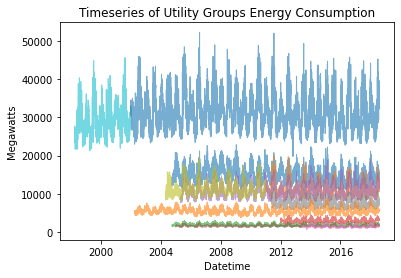

In [6]:
#plot a timeseries with all columns
plt.plot(df_all, linewidth=1,alpha=0.6)
plt.xlabel("Datetime")
plt.ylabel("Megawatts")
plt.title("Timeseries of Utility Groups Energy Consumption")
plt.savefig("Figures/Timeseries_AllData.png")

In [7]:
#subset for date range from 2012-01-01 through 2017-12-31
df_subset = df_all[(df_all.index.get_level_values(0) >= "2012-01-01") & (df_all.index.get_level_values(0) <= "2017-12-31")]

In [8]:
#Provide an entire 6-year range with 10-utility groups
df = df_subset[['AEP_MW', 'COMED_MW', 'DAYTON_MW', 'DEOK_MW', 'DOM_MW', 'DUQ_MW',
                'FE_MW', 'PJME_MW', 'PJMW_MW']]

In [9]:
df.isna().sum()  #EKPC has missing values: drop or fill?

AEP_MW       0
COMED_MW     0
DAYTON_MW    0
DEOK_MW      0
DOM_MW       0
DUQ_MW       0
FE_MW        0
PJME_MW      0
PJMW_MW      0
dtype: int64

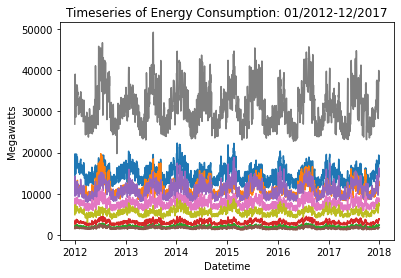

In [10]:
#plot with both PJME_MW and PJMW_MW
plt.plot(df)
plt.xlabel("Datetime")
plt.ylabel("Megawatts")
plt.title("Timeseries of Energy Consumption: 01/2012-12/2017")
plt.savefig("Figures/TimeseriesSubsetAllUtilities.png")

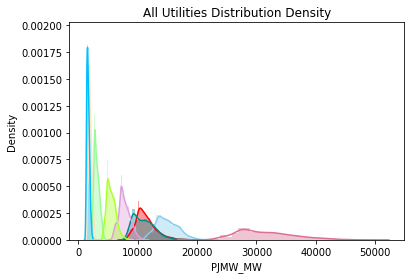

In [11]:
sns.distplot(df['AEP_MW'], color="skyblue", label="AEP")
sns.distplot(df['COMED_MW'], color="red", label="COMED")
sns.distplot(df['DAYTON_MW'], color="bisque", label="DAYTON")
sns.distplot(df['DEOK_MW'], color="palegreen", label="DEOK")
sns.distplot(df['DOM_MW'], color="darkcyan", label="DOM")
sns.distplot(df['DUQ_MW'], color="deepskyblue", label="DUQ")
sns.distplot(df['FE_MW'], color="plum", label="FE")
sns.distplot(df['PJME_MW'], color="palevioletred", label="PJME")
plt.title("All Utilities Distribution Density")
sns.distplot(df['PJMW_MW'], color="greenyellow", label="PJMW")
plt.savefig("Figures/distPlot_AllData.png")

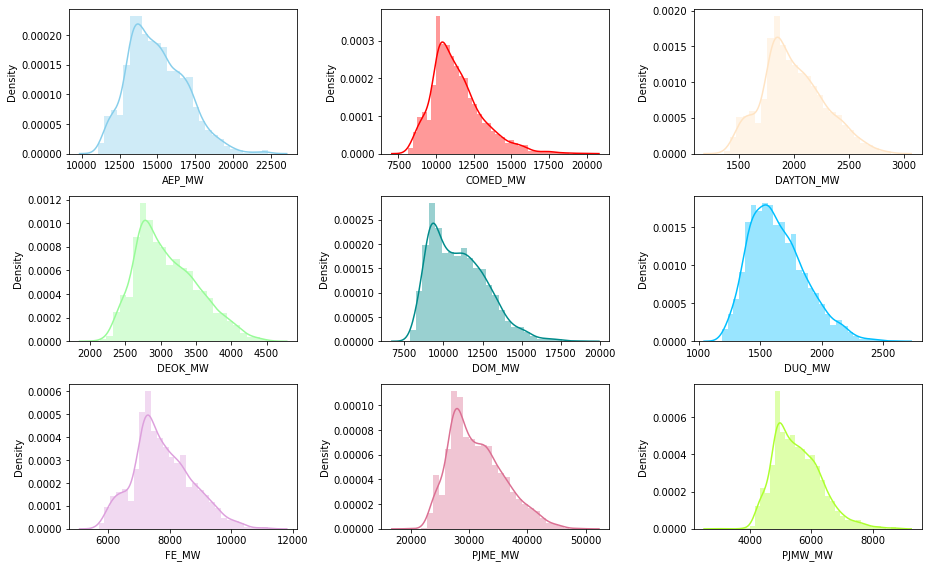

In [12]:
f, axes = plt.subplots(3,3, figsize=(13,8))
sns.distplot(df['AEP_MW'], color="skyblue", label="AEP", ax=axes[0,0])
sns.distplot(df['COMED_MW'], color="red", label="COMED", ax=axes[0,1])
sns.distplot(df['DAYTON_MW'], color="bisque", label="DAYTON", ax=axes[0,2])
sns.distplot(df['DEOK_MW'], color="palegreen", label="DEOK", ax=axes[1,0])
sns.distplot(df['DOM_MW'], color="darkcyan", label="DOM",ax=axes[1,1])
sns.distplot(df['DUQ_MW'], color="deepskyblue", label="DUQ", ax=axes[1,2])
sns.distplot(df['FE_MW'], color="plum", label="FE", ax=axes[2,0])
sns.distplot(df['PJME_MW'], color="palevioletred", label="PJME", ax=axes[2,1])
sns.distplot(df['PJMW_MW'], color="greenyellow", label="PJMW", ax=axes[2,2])
plt.tight_layout()
plt.savefig("Figures/histograms_MW_Utilies.png")

In [13]:
df.head()

AEP_MW      COMED_MW    DAYTON_MW      DEOK_MW  \
Datetime                                                           
2012-01-01  14397.375000   9894.000000  1715.125000  2629.913043   
2012-01-02  16882.958333  11217.833333  2061.166667  3179.875000   
2012-01-03  19687.333333  12487.833333  2352.083333  3503.375000   
2012-01-04  19357.458333  12119.541667  2323.208333  3470.541667   
2012-01-05  17448.541667  11694.000000  2155.833333  3210.125000   

                  DOM_MW       DUQ_MW        FE_MW       PJME_MW      PJMW_MW  
Datetime                                                                       
2012-01-01   9475.250000  1504.916667  6571.583333  26920.916667  4902.875000  
2012-01-02  10587.333333  1686.375000  7533.041667  30463.166667  5857.791667  
2012-01-03  13584.708333  1883.500000  8889.125000  36219.208333  6965.708333  
2012-01-04  14265.166667  1947.750000  8903.041667  39069.166667  7296.583333  
2012-01-05  11898.708333  1794.750000  8425.541667  35579.583333  6425.333333

In [14]:
#Combine datasets of columns into a summed row per day (tidy dataframe)
#PJME and PJMEW are groupings of utility companies; do not include in dataframe
df_summed = df
df_summed.head()
df_summed["Total_MW"] = df["AEP_MW"] + df["COMED_MW"] + df["DAYTON_MW"] + df["DEOK_MW"] + df["DOM_MW"] + df["DUQ_MW"] + df["FE_MW"] 
df_summed = df_summed[['Total_MW']]
df_summed.head()

Total_MW
Datetime                
2012-01-01  46188.163043
2012-01-02  53148.583333
2012-01-03  62387.958333
2012-01-04  62386.708333
2012-01-05  56627.500000

<AxesSubplot:xlabel='Datetime'>

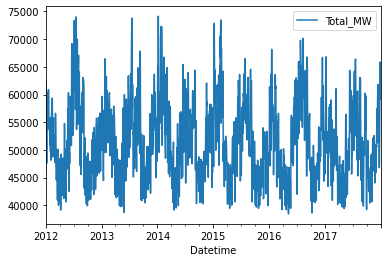

In [15]:
df_summed.plot()

**Histogram showing distribution of Megawatts/day**

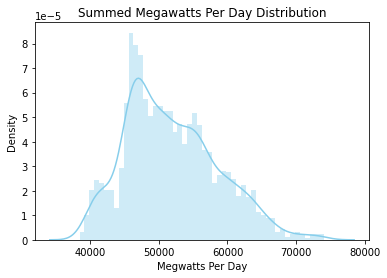

In [16]:
sns.distplot(df_summed, color="skyblue", label="Total MW", bins=50)
plt.title("Summed Megawatts Per Day Distribution")
plt.xlabel("Megwatts Per Day")
plt.savefig("Figures/DistributionMegawattsPerDay.png")

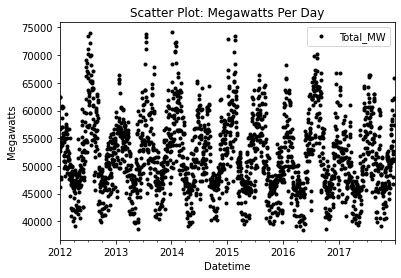

In [17]:
df_summed.plot(style="k.")
plt.ylabel("Megawatts")
plt.title("Scatter Plot: Megawatts Per Day")
plt.savefig("Figures:Scatterplot_AllSummed.png")

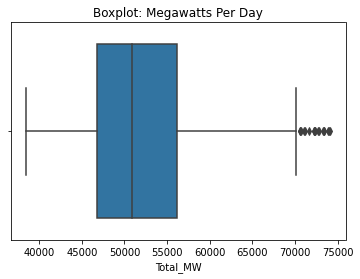

In [18]:
sns.boxplot(x=df_summed["Total_MW"])
plt.title("Boxplot: Megawatts Per Day")
plt.savefig("Figures/Daily_Boxplot.png")

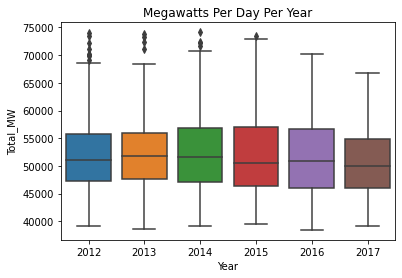

In [19]:
df_year = df_summed
df_year['Year'] = df_year.index.year
ax = sns.boxplot(data=df_year, x='Year', y='Total_MW')
plt.title("Megawatts Per Day Per Year")
plt.savefig("Figures/PerDayPerYearMegawattUsage.png")

In [20]:
df_summed= df_summed[['Total_MW']]
df_summed.head()

Total_MW
Datetime                
2012-01-01  46188.163043
2012-01-02  53148.583333
2012-01-03  62387.958333
2012-01-04  62386.708333
2012-01-05  56627.500000

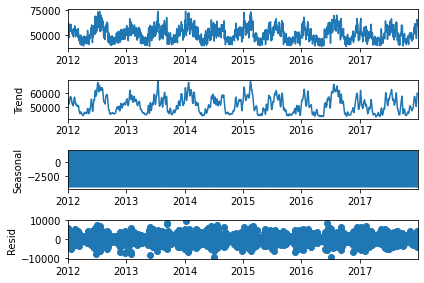

<Figure size 432x288 with 0 Axes>

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_summed)
result.plot()
plt.show()
plt.tight_layout()
plt.savefig("Figures/DailySummed_Seasonality.png")


*Weekly Averaged Megawatts: resampled*

In [22]:
df_W = df_summed.resample("W").mean()
df_W.head()

Total_MW
Datetime                
2012-01-01  46188.163043
2012-01-08  54688.875000
2012-01-15  55755.767857
2012-01-22  57336.458333
2012-01-29  53328.892857

In [23]:
print(df_W.shape)

(314, 1)


In [24]:
week_range = pd.Series(range(1,315))
week_range.head()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [25]:
df_W1 = df_W
df_W1['Weeks'] = week_range.values

In [27]:
df_W1.head(2)

Total_MW  Weeks
Datetime                       
2012-01-01  46188.163043      1
2012-01-08  54688.875000      2

<AxesSubplot:xlabel='Datetime'>

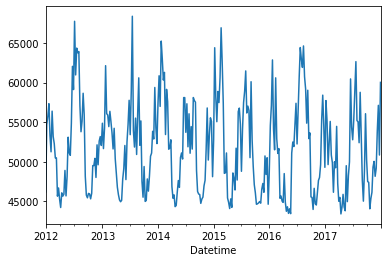

In [28]:
df_W.Total_MW.plot()

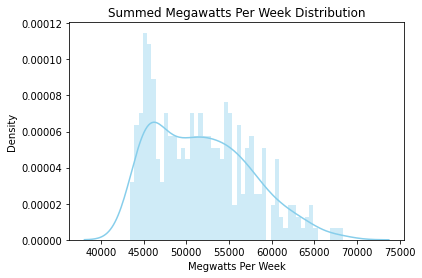

In [29]:
sns.distplot(df_W.Total_MW, color="skyblue", label="Total MW", bins=50)
plt.title("Summed Megawatts Per Week Distribution")
plt.xlabel("Megwatts Per Week")
plt.savefig("Figures/DistributionMegawattsPerWeek.png")

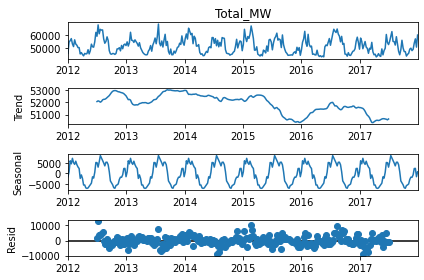

<Figure size 432x288 with 0 Axes>

In [30]:
result = seasonal_decompose(df_W.Total_MW)
result.plot()
plt.show()
plt.tight_layout()
plt.savefig("Figures/WeeklyAveraged_Seasonality.png")

**Export daily, weekly dataframes as .csv**

In [31]:
DailyEnergyConsumption_df = df_summed
WeeklyEnergyConsumption_df = df_W

DailyEnergyConsumption_df.to_csv("DailyEnergyConsumption_df.csv")
WeeklyEnergyConsumption_df.to_csv("WeekyEnergyConsumption_df.csv")
